In [2]:

import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
print(f'Tensorflow version = {tf.__version__}')
print(f'Keras version = {keras.__version__}')


2025-04-16 18:04:28.957860: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-16 18:04:29.009935: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-16 18:04:29.032147: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744815869.059165   61436 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744815869.068155   61436 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1744815869.090523   61436 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

Tensorflow version = 2.19.0
Keras version = 3.9.2


In [3]:
np.random.seed(0)

n = 100
X, Y = make_classification(n_samples = n, n_features = 2, n_redundant= 0, n_informative=2, flip_y=0.05, class_sep=1.5)

X = X.astype(np.float32)
Y = Y.astype(np.int32)

split = [70*n//100]
train_x, test_x = np.split(X, split)
train_labels, test_labels = np.split(Y, split)

In [37]:
def plot_dataset(features, labels, W=None, b=None):
    fig, ax = plt.subplots(1,1)
    ax.set_xlabel('$x_i[0]$ -- (feature 1)')
    ax.set_ylabel('$x_i[1]$ -- (feature 2)')
    colors = ['r' if l else 'b' for l in labels]
    ax.scatter(features[:, 0], features[:, 1], marker='o', c=colors,s=100, alpha=0.5)
    if W is not None:
        min_x = min(features[:,0])
        max_x = max(features[:, 0])
        min_y = min(features[:,1])*(1 - 0.1)
        max_y = max(features[:,1])*(1 + 0.1)
        cx = np.array([min_x,max_x], dtype=np.float32)
        cy = (0.5-W[0]*cx-b)/W[1]
        ax.plot(cx,cy,'g')
        ax.set_ylim(min_y,max_y)
    fig.show()

/tmp/ipykernel_61436/3323808269.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


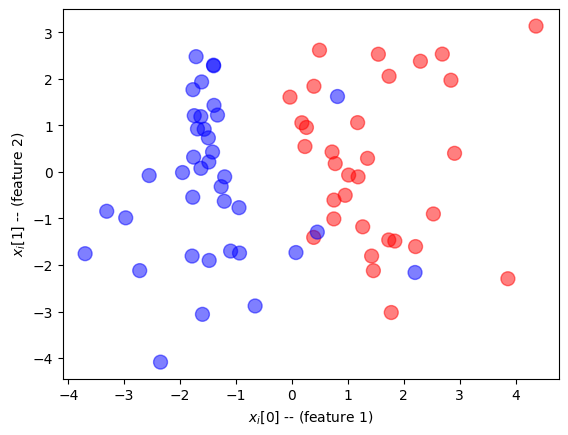

In [38]:
plot_dataset(train_x, train_labels)

In [39]:
train_x_norm = (train_x-np.min(train_x,axis=0)) / (np.max(train_x,axis=0)-np.min(train_x,axis=0))
test_x_norm = (test_x-np.min(train_x,axis=0)) / (np.max(train_x,axis=0)-np.min(train_x,axis=0))

In [40]:
model = keras.models.Sequential()
model.add(keras.Input(shape=(2,)))
model.add(keras.layers.Dense(1))
model.add(keras.layers.Activation(keras.activations.sigmoid))

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 1)              │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

In [41]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.2), loss="binary_crossentropy",metrics=['acc'])

In [48]:
model.fit(x=train_x_norm,y=train_labels,validation_data=(test_x_norm,test_labels),epochs=10,batch_size=1)

Epoch 1/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - acc: 0.6986 - loss: 0.6005 - val_acc: 0.8667 - val_loss: 0.5962
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.8012 - loss: 0.6010 - val_acc: 0.8333 - val_loss: 0.5917
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.8139 - loss: 0.5742 - val_acc: 0.8333 - val_loss: 0.5764
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.8389 - loss: 0.5551 - val_acc: 0.8667 - val_loss: 0.5553
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.8600 - loss: 0.5539 - val_acc: 0.8333 - val_loss: 0.5470
Epoch 6/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.8845 - loss: 0.5432 - val_acc: 0.8333 - val_loss: 0.5373
Epoch 7/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.8600 - loss: 0.5325 - val_acc: 0.9000 - val_loss: 0.5194
Epoch 8/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.8724 - loss: 0.5209 - val_acc: 0.9000 - val_loss: 0.5069
Epoch 9/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.8120 - loss:

/tmp/ipykernel_61436/3323808269.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


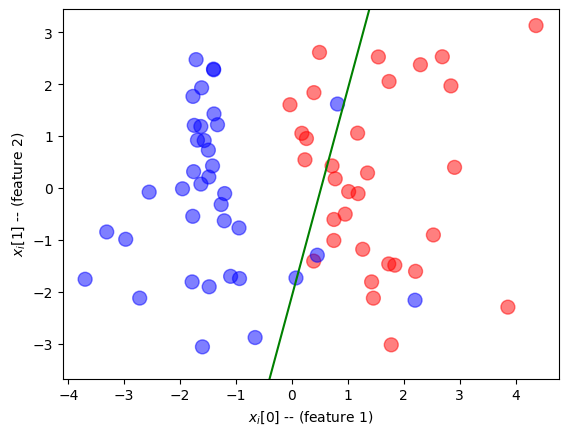

In [49]:
plot_dataset(train_x,train_labels,model.layers[0].weights[0],model.layers[0].weights[1])

In [50]:
model = keras.models.Sequential([
    keras.layers.Dense(1,input_shape=(2,),activation='sigmoid')
])
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.05),loss='binary_crossentropy',metrics=['acc'])
hist = model.fit(x=train_x_norm,y=train_labels,validation_data=(test_x_norm,test_labels))

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 205ms/step - acc: 0.5214 - loss: 0.6896 - val_acc: 0.5000 - val_loss: 0.6855


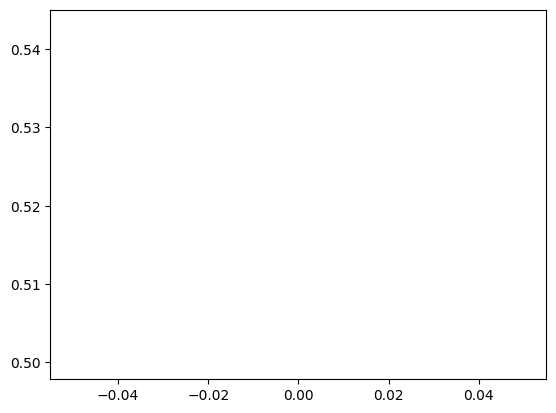

In [ ]:

plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])